# W mesh velocity profiles

We'll do some analysis on the wedge type mesh, which is a mesh that takes advantage of the angular geometry of the case. By doing this, only an angular slice of angle $\gamma$ of the whole system is calculated. 

By doing this simplification we save a lot of computational time at the cost of only being able to work with ideal cases with angular simetry, both in the system's geometry and in the initial/boundary conditions.

Here we'll analyze some data on the velocity profile when the bubble reaches certain height in the bubble column. This serves as a way to compare the results against each other.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme()

## Velocity profiles

In [4]:
W_data_wide = pd.read_csv('dataCyclic.csv')
W_data_wide = W_data_wide.set_index('y')
W_data_wide = W_data_wide.dropna()

In [5]:
W_data = pd.DataFrame()

In [6]:
for col in W_data_wide.columns:
    for i in range(len(W_data_wide)):
        W_data = W_data.append({'y': W_data_wide.index[i], 'z': W_data_wide[col].iloc[i], 'angle': int(col[3])}, ignore_index=True)

Here we only reflect the data along the $y$ axis, as the simulation only gives results on the calculated slice and not the whole system. Because this system has angular simetry the curve could actually be rotated to give the whole image.

In [7]:
W_data_aux = W_data.copy()
W_data_aux['y'] = -W_data_aux['y']
W_data = W_data.append(W_data_aux)

<AxesSubplot:xlabel='y', ylabel='z'>

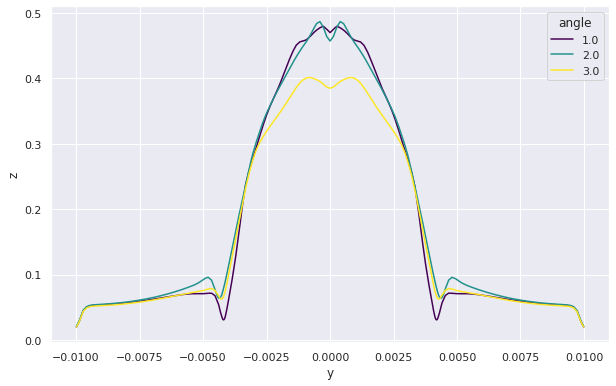

In [10]:
plt.figure(figsize=(10,10/1.618))
sns.lineplot(data=W_data, x='y', y='z', hue='angle', palette='viridis')

## RMS

In [11]:
W_data['z'] = W_data['z']**2

In [12]:
np.sqrt(W_data.groupby('angle').sum()['z']/1000)

angle
1.0    0.342994
2.0    0.344407
3.0    0.304656
Name: z, dtype: float64

The RMS error shows that actually it's value increases a little in smaller angles

## Convergence

We'll take the ratio of two neigboor angles to see if the results are converging to one solution.

In [19]:
W_conv2 = pd.DataFrame()
W_conv3 = pd.DataFrame()

In [20]:
W_conv2['E'] = W_data_wide['deg2']/W_data_wide['deg1']
W_conv3['E'] = W_data_wide['deg3']/W_data_wide['deg2']

In [21]:
W_conv2['n']=2
W_conv3['n']=3

In [22]:
W_conv = W_conv2.append(W_conv3)

In [23]:
W_conv= W_conv.reset_index()

Again, we reflect the curve along the $y$ axis.

In [26]:
W_conv_aux = W_conv.copy()
W_conv_aux['y'] = -W_conv_aux['y']
W_conv = W_conv.append(W_conv_aux)

<AxesSubplot:xlabel='y', ylabel='E'>

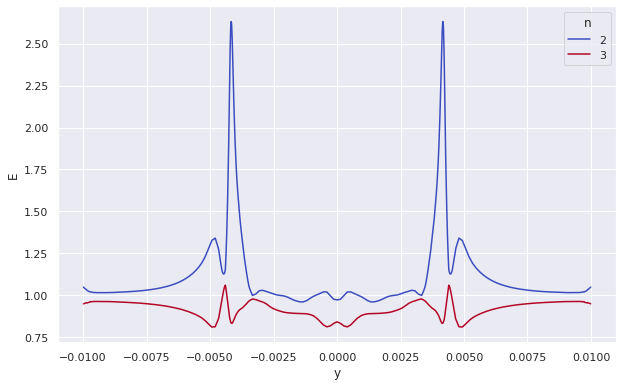

In [31]:
plt.figure(figsize=(10,10/1.618))
sns.lineplot(data=W_conv, x='y', y='E', hue='n', palette='coolwarm')